In [1]:
import numpy as np 

import pandas as pd 

import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df=pd.read_csv('C:\\Users\\Maram\\Desktop\\GoMyCode\\titanic-passengers.csv', sep=';')

In [3]:
df['Cabin'].fillna('G6', inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [7]:
df['Embarked'].fillna('S', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int32(2), int64(4), object(4)
memory usage: 76.7+ KB


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x = df[['Sex','Pclass']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


In [10]:
np.isnan(x_train)
np.isnan(y_train)

105    False
68     False
253    False
320    False
706    False
       ...  
835    False
192    False
629    False
559    False
684    False
Name: Survived, Length: 668, dtype: bool

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
model = tree.DecisionTreeClassifier()  
model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8026905829596412


In [13]:
clf=DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)


In [14]:
import graphviz

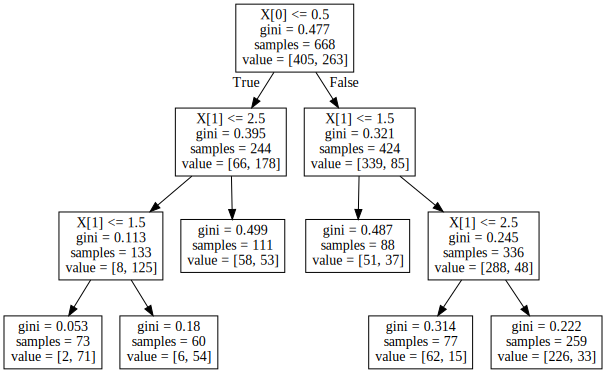

In [15]:
data=tree.export_graphviz(clf, out_file=None)
graph=graphviz.Source(data)
graph.render('df')
graph

In [16]:
dtree=tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)

In [18]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(x_train, y_train)
Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

78.14 %
